In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/secondary_data.csv', sep=';')

In [ ]:
df_1 = df.loc[df["class"] == "e"]
df_2 = df.loc[df["class"] == "p"]

In [ ]:
X_1 = df_1.drop("class", axis=1)
X_2 = df_2.drop("class", axis=1)
y_1 = df_1["class"]
y_2 = df_2["class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.15, random_state=87)
X_train_1, X_validation_1, y_train_1, y_validation_1 = train_test_split(X_train_1, y_train_1, test_size=0.18, random_state=87)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.15, random_state=87)
X_train_2, X_validation_2, y_train_2, y_validation_2 = train_test_split(X_train_2, y_train_2, test_size=0.18, random_state=87)

In [ ]:
X_train_inicial = pd.concat([X_train_1, X_train_2], ignore_index=True)
X_validation_inicial = pd.concat([X_validation_1, X_validation_2], ignore_index=True)
X_test_inicial = pd.concat([X_test_1, X_test_2], ignore_index=True)

y_train = pd.concat([y_train_1, y_train_2], ignore_index=True)
y_validation= pd.concat([y_validation_1, y_validation_2], ignore_index=True)
y_test = pd.concat([y_test_1, y_test_2], ignore_index=True)

#Encodings:

In [ ]:
#Para el target 1 si es e, 0 si es p

In [ ]:
y_train = y_train.map(lambda x: 1 if x == 'e' else 0)
y_validation = y_validation.map(lambda x: 1 if x == 'e' else 0)
y_test = y_test.map(lambda x: 1 if x == 'e' else 0)

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

In [ ]:
ohe_features = ce.OneHotEncoder(cols = ["does-bruise-or-bleed", "has-ring", "veil-type"], return_df=True)
X_train = ohe_features.fit_transform(X_train_inicial)
X_test = ohe_features.transform(X_test_inicial)
X_validation = ohe_features.transform(X_validation_inicial)

In [ ]:
te_features =  ce.TargetEncoder(cols = ["habitat", "season"], smoothing=2, return_df=True)
X_train = te_features.fit_transform(X_train, y_train)
X_test = te_features.transform(X_test, y_test)
X_validation = te_features.transform(X_validation, y_validation)

In [ ]:
be_features = ce.BinaryEncoder(cols = ["cap-shape", "cap-surface", "cap-color", "gill-attachment", "gill-spacing", "gill-color",
              "stem-color", "ring-type", "stem-root", "stem-surface", "veil-color", "spore-print-color"], return_df=True)
X_train = be_features.fit_transform(X_train)
X_test = be_features.transform(X_test)
X_validation = be_features.transform(X_validation)

#RandomForest

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
rf = RandomForestClassifier(random_state=10)

In [ ]:
params = [
    {'n_estimators': [40, 60, 80, 100, 120, 140]},
    {'max_depth': [5, 10, 15, 20]},
    {"min_samples_split": [2, 5, 8, 10]},
    {"min_samples_leaf": [1, 2, 4]},
    {"max_features": ["sqrt", "log2", None]},
    {"bootstrap" : [True, False]},
    {"oob_score" : [True, False]},
    {"random_state":[10]}
]

In [ ]:
gs = GridSearchCV(rf, param_grid = params, cv=5, scoring='roc_auc')

In [ ]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid=[{'n_estimators': [40, 60, 80, 100, 120, 140]},
                         {'max_depth': [5, 10, 15, 20]},
                         {'min_samples_split': [2, 5, 8, 10]},
                         {'min_samples_leaf': [1, 2, 4]},
                         {'max_features': ['sqrt', 'log2', None]},
                         {'bootstrap': [True, False]},
                         {'oob_score': [True, False]}, {'random_state': [10]}],
             scoring='roc_auc')

In [ ]:
gs.best_params_

{'n_estimators': 40}

In [ ]:
rf_clf = gs.best_estimator_

In [ ]:
rf_clf

RandomForestClassifier(n_estimators=40, random_state=10)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, random_state=10)

In [ ]:
roc_auc_score(y_validation, rf_clf.predict_proba(X_validation)[:, 1])

1.0

In [ ]:
from joblib import dump

In [ ]:
dump(rf_clf, '/content/drive/MyDrive/rf_clf_mushroom.joblib')

['/content/drive/MyDrive/rf_clf_mushroom.joblib']

#Extra: Feature importances

#Graficar la importancia de features para el Random Forest de la parte III. ¿Qué tanto se parece a los features importantes de la parte II?

In [ ]:
rf_clf.feature_importances_

array([0.06668774, 0.01634892, 0.01753343, 0.01209607, 0.01994931,
       0.02363406, 0.0210924 , 0.01998576, 0.00913389, 0.01040747,
       0.01316578, 0.01352142, 0.01734186, 0.01958087, 0.01564315,
       0.02252124, 0.02432143, 0.02994107, 0.02243516, 0.03122118,
       0.02261194, 0.01361697, 0.0164767 , 0.019247  , 0.01764499,
       0.0584956 , 0.09994319, 0.0102788 , 0.01764479, 0.0120697 ,
       0.02059138, 0.01630788, 0.01839356, 0.01463254, 0.00875338,
       0.01599257, 0.01812553, 0.02596432, 0.00513797, 0.00501201,
       0.00767591, 0.00862797, 0.00396346, 0.01163709, 0.01332776,
       0.01097412, 0.00791933, 0.00578447, 0.0096609 , 0.00979403,
       0.00375215, 0.00463766, 0.00315188, 0.0229868 , 0.01260346])

In [ ]:
feature_importance = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': rf_clf.feature_importances_
})

In [ ]:
cols_iniciales = X_train_inicial.columns

In [ ]:
suma_features = {}
for nombre_col in cols_iniciales:
  suma_features[nombre_col] = 0

In [ ]:
for nombre_col in cols_iniciales:
  suma_features[nombre_col] = feature_importance[feature_importance['Feature'].str.contains(nombre_col)]['Importance'].sum()

In [ ]:
feature_importance = pd.DataFrame(data={"Feature" : suma_features.keys(), "Importance" : suma_features.values()})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'cap-diameter'),
  Text(1, 0, 'cap-shape'),
  Text(2, 0, 'cap-surface'),
  Text(3, 0, 'cap-color'),
  Text(4, 0, 'does-bruise-or-bleed'),
  Text(5, 0, 'gill-attachment'),
  Text(6, 0, 'gill-spacing'),
  Text(7, 0, 'gill-color'),
  Text(8, 0, 'stem-height'),
  Text(9, 0, 'stem-width'),
  Text(10, 0, 'stem-root'),
  Text(11, 0, 'stem-surface'),
  Text(12, 0, 'stem-color'),
  Text(13, 0, 'veil-type'),
  Text(14, 0, 'veil-color'),
  Text(15, 0, 'has-ring'),
  Text(16, 0, 'ring-type'),
  Text(17, 0, 'spore-print-color'),
  Text(18, 0, 'habitat'),
  Text(19, 0, 'season')])

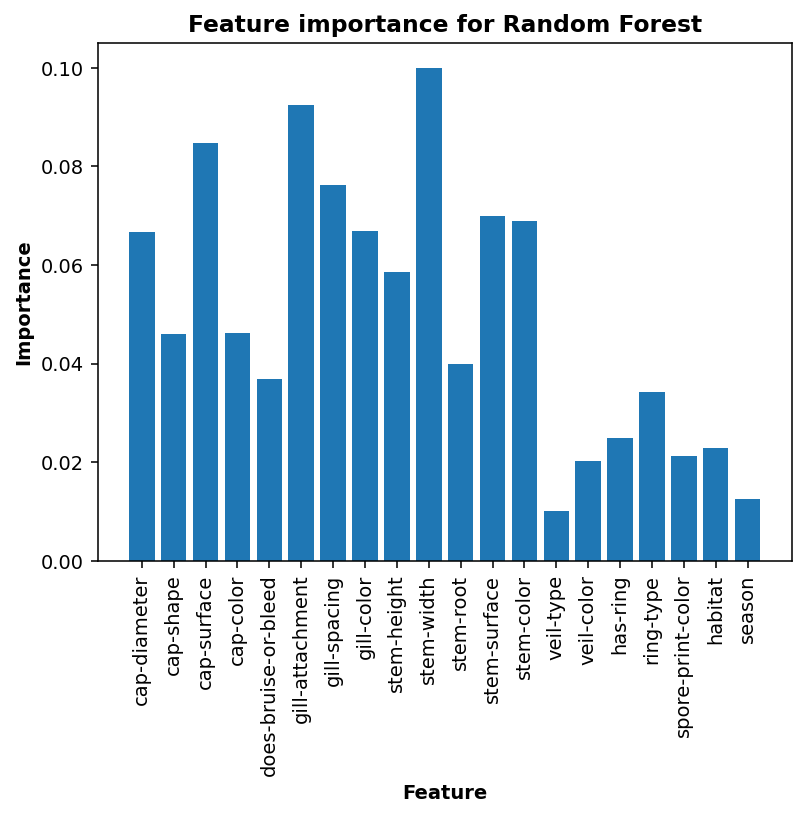

In [ ]:
import matplotlib.pyplot as plt
plt.figure(dpi=140)
plt.bar(x=feature_importance['Feature'], height=feature_importance['Importance'])
plt.title("Feature importance for Random Forest", fontweight= "bold")
plt.xlabel(xlabel="Feature", fontweight= "bold")
plt.ylabel(ylabel="Importance", fontweight= "bold")
plt.xticks(rotation=90)

¿Qué tanto se parece a los features importantes de la parte II?

Son bastantes distintos. Antes, para la regresion logistica que utilice en la parte 2 las feature que eran más importantes son las que ahora acá son menos importantes.


#Extra: Utilizando los árboles creados por el Random Forest y la importancia de los features, cree un árbol de decisión simple para que una persona normal pueda identificar si un hongo es comestible o no. Qué nivel de error posee este árbol al intentar clasificar un set de datos de testing?

In [ ]:
rf_clf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1165313289),
 DecisionTreeClassifier(max_features='sqrt', random_state=1283169405),
 DecisionTreeClassifier(max_features='sqrt', random_state=89128932),
 DecisionTreeClassifier(max_features='sqrt', random_state=2124247567),
 DecisionTreeClassifier(max_features='sqrt', random_state=574014784),
 DecisionTreeClassifier(max_features='sqrt', random_state=1902734705),
 DecisionTreeClassifier(max_features='sqrt', random_state=1068604539),
 DecisionTreeClassifier(max_features='sqrt', random_state=1425548444),
 DecisionTreeClassifier(max_features='sqrt', random_state=2141071321),
 DecisionTreeClassifier(max_features='sqrt', random_state=357864157),
 DecisionTreeClassifier(max_features='sqrt', random_state=965494256),
 DecisionTreeClassifier(max_features='sqrt', random_state=108111773),
 DecisionTreeClassifier(max_features='sqrt', random_state=850673521),
 DecisionTreeClassifier(max_features='sqrt', random_state=898541562),
 DecisionTreeC

In [ ]:
tree0 = rf_clf.estimators_[0]

In [ ]:
from sklearn import tree

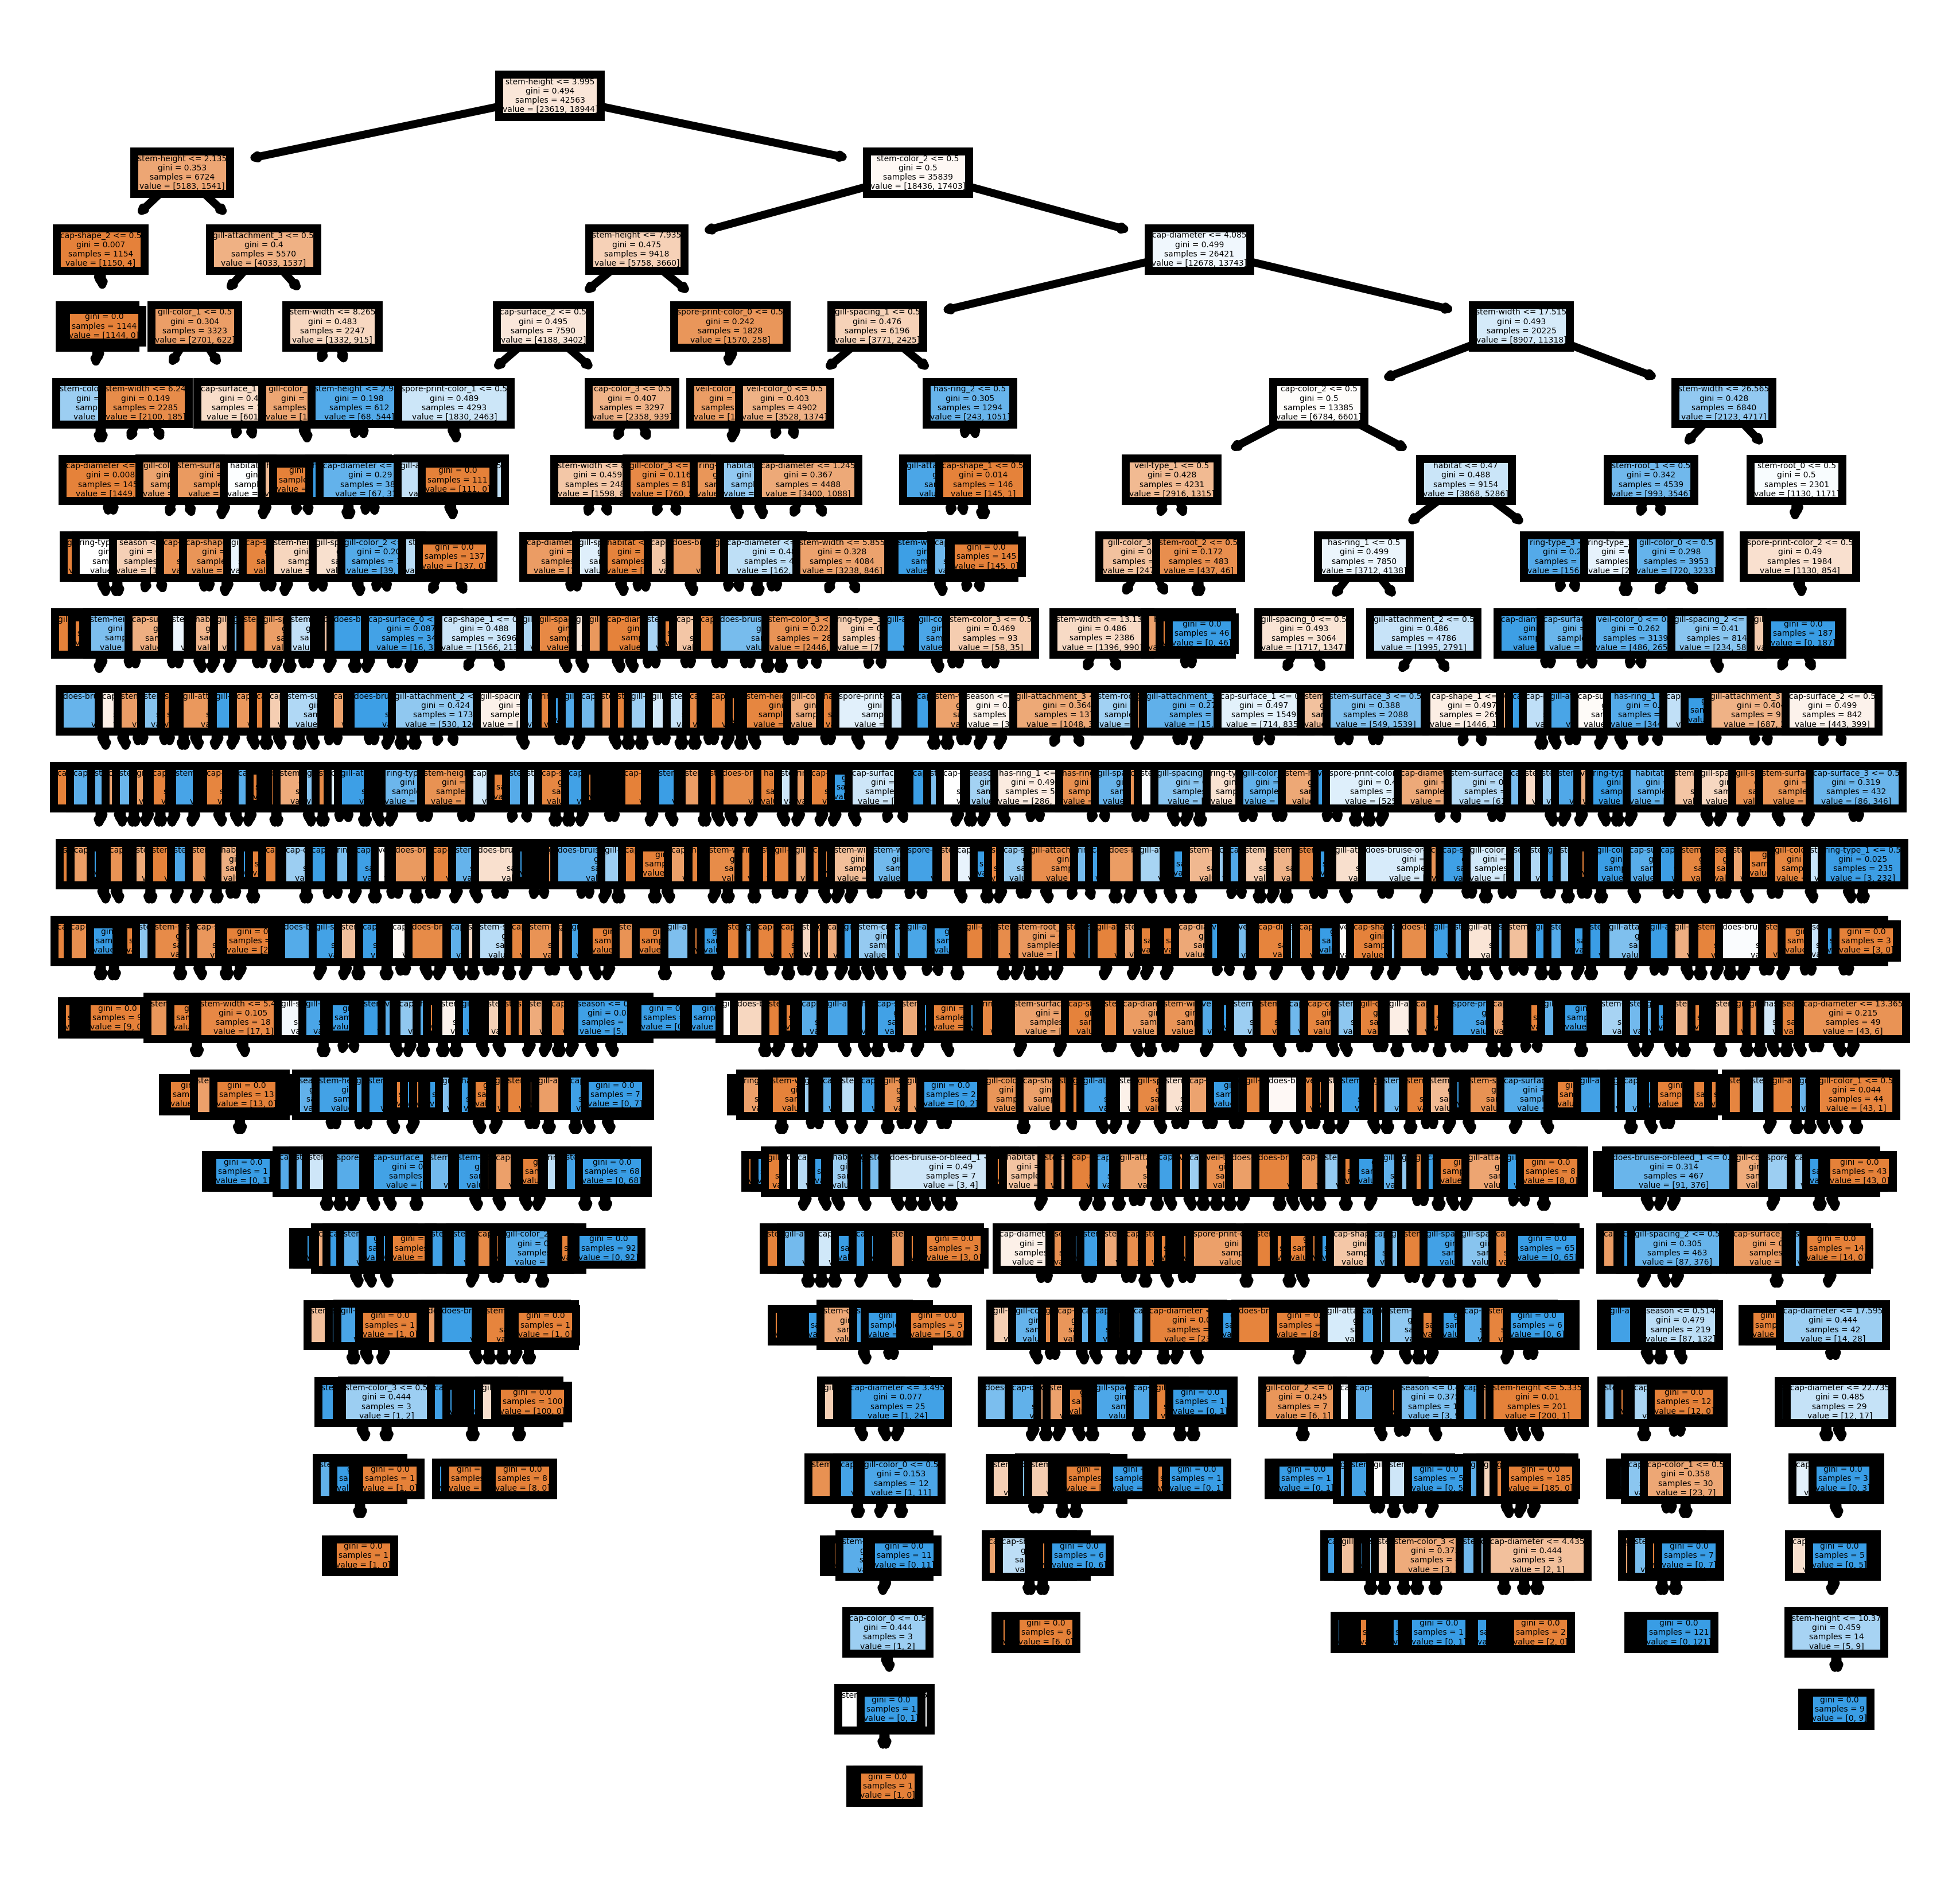

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree0,
               feature_names = X_train.columns,
               filled = True);

In [ ]:
tree0.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt', random_state=1165313289)

In [ ]:
roc_auc_score(y_validation, tree0.predict_proba(X_validation)[:, 1])

0.996581126823983

In [ ]:
roc_auc_score(y_test, tree0.predict_proba(X_test)[:, 1])

0.9962909534725876